In [ ]:
from tensorflow.keras.models import load_model 

model = load_model('Unetsegmodel_bwt_lr_e3_bs_16.hdf5') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/image.zip 

In [ ]:
import numpy as np, os, glob
from tqdm import tqdm
import cv2

imagesPath = os.path.join('image', '*') 
Images = glob.glob(imagesPath)

X = np.zeros((len(Images), 256, 256, 3), dtype=np.float32) 

for n, imagepath in tqdm(enumerate(Images)):
    img = cv2.imread(imagepath)
    img = cv2.resize(img, (256, 256))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255. 
    X[n] = img


15900it [01:50, 143.84it/s]


In [ ]:
BATCHSIZE = 128
batches = int(len(X) / BATCHSIZE)
Y = np.zeros((len(X), 256, 256, 1), dtype=np.bool_) 
print(batches) 

124


In [ ]:
from skimage.filters import threshold_otsu

for b in range(batches):
 predictions = model.predict(X[b*BATCHSIZE:b*BATCHSIZE+BATCHSIZE,:]) 
 batch = np.zeros((len(predictions), 256, 256, 1), dtype=np.bool_) 
 for i, prediction in enumerate(predictions):
    thresh = threshold_otsu(prediction)
    batch[i,:] = prediction > thresh 

 Y[b*BATCHSIZE:b*BATCHSIZE+BATCHSIZE,:] = batch


4/4 [==============================] - 0s 99ms/step


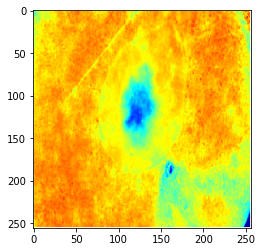

In [ ]:
from matplotlib import pyplot as plt 
%matplotlib inline 

plt.imshow(X[3]) 

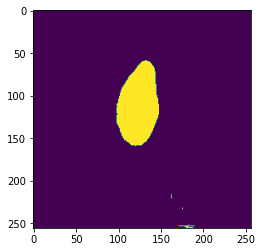

In [ ]:
plt.imshow(Y[3].reshape((256,256))) 

In [ ]:
def apply_mask(image, mask):
    mask = mask.astype("uint8")
    seg = cv2.bitwise_and(image, image, mask=mask)
    return seg


In [ ]:
def show_images(images):
    n: int = len(images)
    f = plt.figure()
    for i in range(n):
        # Debug, plot figure
        f.add_subplot(1, n, i + 1) 
        plt.imshow(images[i])

    plt.show(block=True)

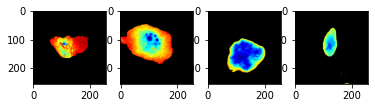

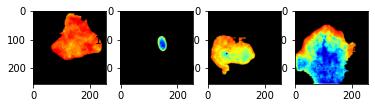

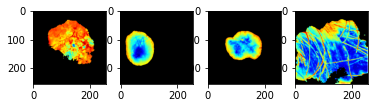

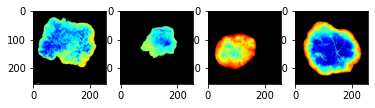

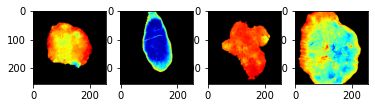

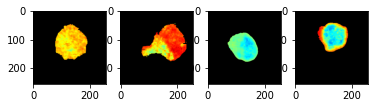

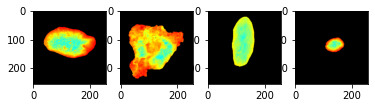

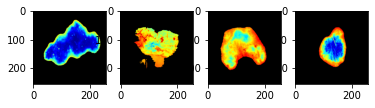

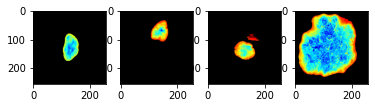

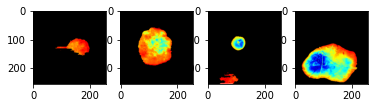

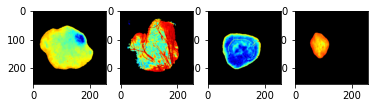

In [ ]:
for i in range(len(X)//3):
  masked = []
  for image, mask in zip(X[i*4:(i*4)+4], Y[i*4:(i*4)+4]):
    seg = apply_mask(image, mask)
    masked.append(seg) 
  show_images(masked)
  if i == 10:
    break

In [ ]:
from PIL import Image
from tqdm import tqdm

imagesPath = os.path.join('image')
Images = os.listdir(imagesPath)
dest = os.path.join('drive', 'MyDrive', 'segPredictedMasksfinale3')

for i, impath in tqdm(enumerate(Images)):
  im = Image.fromarray(Y[i].reshape((256, 256)))
  path = os.path.join(dest, '{}_segmentation.{}'.format(impath[:-4], 'png')) 
  im.save(path) 


15900it [01:11, 221.25it/s]


In [ ]:
print(len(os.listdir(dest))) 

15900
